In [23]:
import pandas as pd
import numpy as np

f19_sales = pd.read_csv('../data/F19Sales.csv')
sales = f19_sales
sales.rename(columns = {'Customer ID':'ID Value'}, inplace = True)

alum = pd.read_csv('../data/AlumniReport.csv')

merge = pd.merge(left=sales, right=alum, on=['ID Value'])

merge.head()

,ID Value,Item,Qty,PL,PT,I Disp,Seatblock,Priority Points,Item Cost,Csz,...,Item Name,Degree,ID Type,Primary Degree Institution,Primary Degree Class Year,Primary Degree Education College,Primary Degree Education Status,Primary Address Country,Primary Address State,Primary Address Zip Code
0,122853,F10,1,1,SHP,E (Email),"1:23:43:3,3",999.13,75.29,"Frisco, TX 75034",...,Michigan State,B.S.E.(E.E.) 1966 College of Engineering,Athletics Ticket ID,University of Michigan - Ann Arbor,1966.0,College of Engineering,Graduated,United States,Texas,75034
1,26314,F08,2,5,PD,M (Mail),"1:15:33:6,5",998.13,290.00,"Saint Joseph, MI 49085",...,Notre Dame,"Attended 1959 College of Lit, Science & Arts; ...",Athletics Ticket ID,University of Michigan - Ann Arbor,1964.0,Law School,Graduated,United States,Michigan,49085
2,433040,F05,3,9,TP,MD (Mobile Delivery),"1:311E:8:13,11",997.48,225.87,"Wilmington, DE 19807",...,Iowa,"A.B. 1984 College of Lit, Science & Arts",Athletics Ticket ID,University of Michigan - Ann Arbor,1984.0,"College of Lit, Science & Arts",Graduated,United States,Delaware,19807
3,433040,F12,2,9,TP,MD (Mobile Delivery),"1:311E:8:13,12",997.48,150.52,"Wilmington, DE 19807",...,Ohio State,"A.B. 1984 College of Lit, Science & Arts",Athletics Ticket ID,University of Michigan - Ann Arbor,1984.0,"College of Lit, Science & Arts",Graduated,United States,Delaware,19807
4,57747,F10,4,5,PD,M (Mail),"1:35:93:24,21",994.83,604.00,"Grosse Pointe Farms, MI 48236",...,Michigan State,"A.B. 1978 College of Lit, Science & Arts",Associated Athletics Ticket ID,University of Michigan - Ann Arbor,1978.0,"College of Lit, Science & Arts",Graduated,United States,Michigan,48236


In [22]:
total_tickets_sold = 0
for qty in sales['Qty']:
    qty = qty.replace(',', '')
    total_tickets_sold += int(qty)

# Total number of tickets sold
total_tickets_sold

207092

In [27]:
# Find a alum grad. year for every ticket sold
sales_graduation_years = []
for i, year in enumerate(merge['Primary Degree Class Year']):
    for _ in range(int(merge['Qty'][i])):
        sales_graduation_years.append(int(year))

# Number of alum tickets sold
len(sales_graduation_years)

22507

Text(0.5, 0, 'Graduation Year')

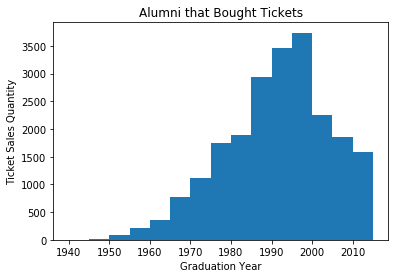

In [47]:
import matplotlib.pyplot as plt

# Remove the one 0??
while np.min(sales_graduation_years) == 0:
    sales_graduation_years.remove(0)

bins = np.arange(1940,2020,5)

# Look at alum that bought tickets based on grad year
plt.hist(x=sales_graduation_years,bins=bins)
plt.title('Alumni that Bought Tickets')
plt.ylabel('Ticket Sales Quantity')
plt.xlabel('Graduation Year')
# plt.axis([1800, 2020, 0, 20000])

Text(0.5, 0, 'Estimated Age (based on graduation at 21)')

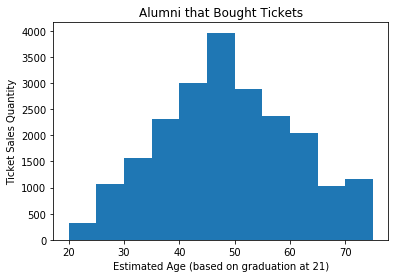

In [52]:
# Estimate ages

bins = np.arange(20, 80, 5)
ages = []
for year in sales_graduation_years:
    ages.append(2020 - (year - 21))

plt.hist(x=ages,bins=bins)
plt.title('Alumni that Bought Tickets')
plt.ylabel('Ticket Sales Quantity')
plt.xlabel('Estimated Age (based on graduation at 21)')
